# Synthetic Spectra

- Generates a synthetic spectrum with prescribed slope and random phase
- Transforms back to physical space
- Decomposes the flow into rotational and divergent using Smith (2007)/ Kim (2010)
- Creates a more geophysical flow by controling the divergence in the final velocity field

Good seeds: 15!, 10, 31, 222, 1(maybe), 7, 103 (m) 

In [47]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib import ticker
from pyspec import spectrum as spec
from aux import synthetic_velocity, smith2007_decomposition
import cmocean.cm as cmo
from utils_syn import *

In [48]:
seed = 15 #110
N = 1000. # number of samples
dx = 0.5 #dx = 2.5 # spatial sampling [km]
x = np.arange(0,N*dx, dx) # meridional distance [km]
y = np.arange(0,N*dx, dx) # zonal distance [km]

# Compute synthetic velocity with random phase 
uk1, vk1, Uk1 = synthetic_velocity(N=N, dx=dx, slope=1., k_thr=1.e-12, seed=seed)
uk2, vk2, Uk2 = synthetic_velocity(N=N, dx=dx, slope=2., k_thr=1.e-12, seed=seed)
uk3, vk3, Uk3 = synthetic_velocity(N=N, dx=dx, slope=3., k_thr=1.e-12, seed=seed)

In [49]:
# Computes the isotropic spectrum of the speed
spec1 = spec.TWODimensional_spec(Uk1,dx,dx, detrend=True)
spec2 = spec.TWODimensional_spec(Uk2,dx,dx, detrend=True)
spec3 = spec.TWODimensional_spec(Uk3,dx,dx, detrend=True)

In [50]:
# Prescribed spectral slopes
k_range = np.linspace(5e-3,2e-1, 10)

### Synthetic random velocity field with prescribes spectral slope

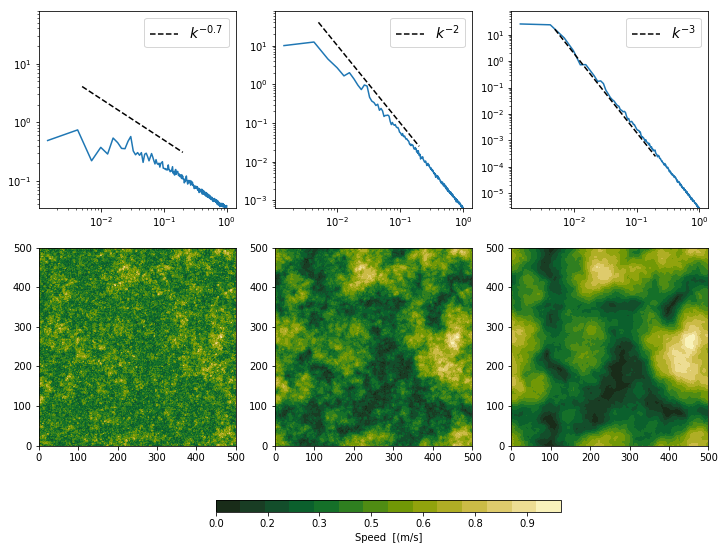

In [51]:
plot_random_synvel(spec1, spec2, spec3, x, y, Uk1, Uk2, Uk3, k_range)

##### Now, we use Smith (2007)'s method to decompose the flow into rotational and divergent:

The genral idea is that the flow can be decomposed in to a part that is purely divergent (described by a velocity potential $\phi$) and a part that is purely rotational(described by a stream function $\psi$) such that the sum of both reconstruct the original velocities completely, except for the mean (since it has infinite wavelenght).

So, let $u$ and $v$ be the $x$ and $y$ components of the horizontal velocity, such that their Fourier transform are $\widehat{u}$ and $\widehat{v}$, respectively.

Now, the Fourier tranform of the divergent flow is constructed by geometry:

\begin{equation}
\widehat{U}_{\phi} = \widehat{u}\cos{\theta_{kl}}
+ \widehat{v}\sin{\theta_{kl}},
\end{equation}

where $\theta_{kl}$ is the angle of the wavenumber vector ${\bf K} = k{\bf i} + l{\bf j}$. Then, the the contribution of the the divergent component to $u$ and $v$:

\begin{equation}
\widehat{u}_{\phi} = \widehat{U}_{\phi}\cos{\theta_{kl}},
\end{equation}

\begin{equation}
\widehat{v}_{\phi} = \widehat{U}_{\phi}\sin{\theta_{kl}}.
\end{equation}

therefore

\begin{equation}
u_{\phi} = \mathcal{F}^{-1}\left(\widehat{U}_{\phi}\cos{\theta_{kl}}\right),
\end{equation}

\begin{equation}
v_{\phi} = \mathcal{F}^{-1}\left(\widehat{U}_{\phi}\sin{\theta_{kl}}\right)
\end{equation}

Similarly for the rotational component we can write:

\begin{equation}
\widehat{U}_{\psi} = -\widehat{u}\sin{\theta_{kl}}
+ \widehat{v}\cos{\theta_{kl}},
\end{equation}

such that

\begin{equation}
u_{\psi} = \mathcal{F}^{-1}\left(-\widehat{U}_{\psi}\sin{\theta_{kl}}\right),
\end{equation}

\begin{equation}
v_{\psi} = \mathcal{F}^{-1}\left(\widehat{U}_{\psi}\cos{\theta_{kl}}\right),
\end{equation}

where the conditions: $v = v_{\phi} + v_{\psi}$ and $u = u_{\phi} + u_{\psi}$ are satisfied.


In [52]:
# Decomposes the velocity fields into rotational and divergent
u1_phi,v1_phi,u1_psi,v1_psi = smith2007_decomposition(uk1,vk1,dx,dx)
u2_phi,v2_phi,u2_psi,v2_psi = smith2007_decomposition(uk2,vk2,dx,dx)
u3_phi,v3_phi,u3_psi,v3_psi = smith2007_decomposition(uk3,vk3,dx,dx)

In [53]:
U1_phi = (u1_phi**2 + v1_phi**2)**.5
U1_psi = (u1_psi**2 + v1_psi**2)**.5
U2_phi = (u2_phi**2 + v2_phi**2)**.5
U2_psi = (u2_psi**2 + v2_psi**2)**.5
U3_phi = (u3_phi**2 + v3_phi**2)**.5
U3_psi = (u3_psi**2 + v3_psi**2)**.5

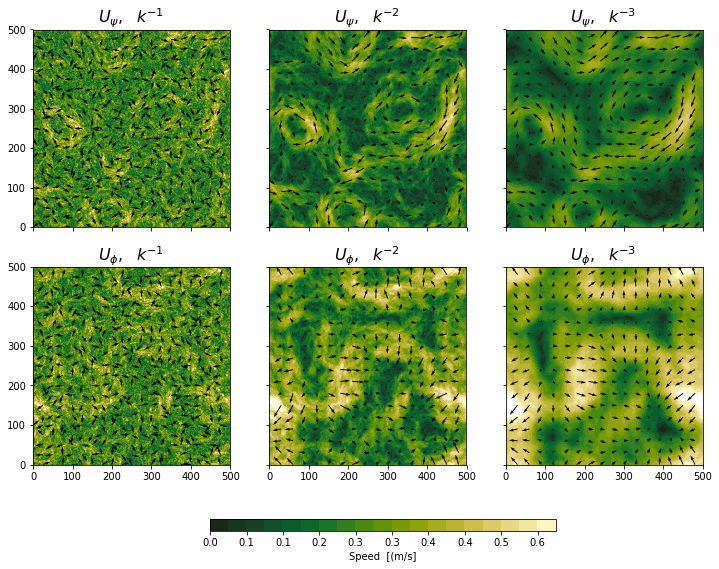

In [54]:
plot_quiver(np.linspace(0,0.6,20), cmo.speed_r,'black', U1_psi, U2_psi, U3_psi, U1_phi, U2_phi, U3_phi,\
    u1_psi, v1_psi, u2_psi, v2_psi, u3_psi, v3_psi, u1_phi, v1_phi, u2_phi, v2_phi, u3_phi, v3_phi, x)

In [55]:
EU1_phi = spec.TWODimensional_spec(U1_phi,dx,dx, detrend=True)
EU2_phi = spec.TWODimensional_spec(U2_phi,dx,dx, detrend=True)
EU3_phi = spec.TWODimensional_spec(U3_phi,dx,dx, detrend=True)
EU1_psi = spec.TWODimensional_spec(U1_psi,dx,dx, detrend=True)
EU2_psi = spec.TWODimensional_spec(U2_psi,dx,dx, detrend=True)
EU3_psi = spec.TWODimensional_spec(U3_psi,dx,dx, detrend=True)

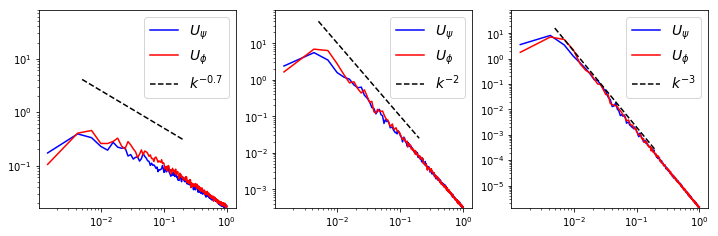

In [56]:
# Prescribed spectral slopes
k_range = np.linspace(5e-3,2e-1, 10)
E1 = k_range**-.7/10
E2 = k_range**-2./1.e3
E3 = k_range**-3./5.e5

lin = np.linspace(0,1,15)
fig = plt.figure(figsize=(12,8))
fig.add_subplot(231)
plt.loglog(EU1_psi.ki, EU1_psi.ispec, 'b', label='$U_{\psi}$')
plt.loglog(EU1_phi.ki, EU1_phi.ispec, 'r', label='$U_{\phi}$')
plt.loglog(k_range, E1, '--k', label='$k^{-0.7}$')
plt.ylim([0,80])
plt.legend(fontsize=14)
fig.add_subplot(232)
plt.loglog(EU2_psi.ki, EU2_psi.ispec, 'b', label='$U_{\psi}$')
plt.loglog(EU2_phi.ki, EU2_phi.ispec, 'r', label='$U_{\phi}$')
plt.loglog(k_range, E2, '--k', label='$k^{-2}$')
plt.ylim([0,80])
plt.legend(fontsize=14)
fig.add_subplot(233)
plt.loglog(EU3_psi.ki, EU3_psi.ispec, 'b', label='$U_{\psi}$')
plt.loglog(EU3_phi.ki, EU3_phi.ispec, 'r', label='$U_{\phi}$')
plt.loglog(k_range, E3, '--k', label='$k^{-3}$')
plt.ylim([0,80])
plt.legend(fontsize=14)

##### Should I get only small-scale divergence?

In [57]:
Lw = 50./dx
Nw = int(Lw)
h1 = np.reshape(np.hanning(Nw), (1,Nw))
han = h1*h1.T

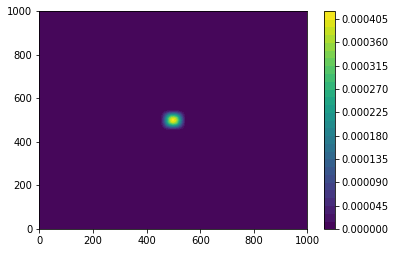

In [58]:
N = int(N)
window = np.zeros([N,N])
nw1 = N/2 - Nw/2
nw2 = N/2 + Nw/2
window[nw1:nw2,nw1:nw2] = han
window = window/window.sum()
plt.contourf(window, 30)
plt.colorbar()

In [59]:
winh = np.fft.rfft2(window)
u1ph = np.fft.rfft2(u1_phi)
v1ph = np.fft.rfft2(v1_phi)
u2ph = np.fft.rfft2(u2_phi)
v2ph = np.fft.rfft2(v2_phi)
u3ph = np.fft.rfft2(u3_phi)
v3ph = np.fft.rfft2(v3_phi)

In [60]:
u1p_f = np.fft.irfft2(winh*u1ph)
v1p_f = np.fft.irfft2(winh*v1ph)
u2p_f = np.fft.irfft2(winh*u2ph)
v2p_f = np.fft.irfft2(winh*v2ph)
u3p_f = np.fft.irfft2(winh*u3ph)
v3p_f = np.fft.irfft2(winh*v3ph)

In [61]:
U1pf = (u1p_f**2 + v1p_f**2)**.5
U2pf = (u2p_f**2 + v2p_f**2)**.5
U3pf = (u3p_f**2 + v3p_f**2)**.5
U1pf_diff = ( (u1_phi-u1p_f)**2 + (v1_phi-v1p_f)**2 )**.5
U2pf_diff = ((u2_phi - u2p_f)**2 + (v2_phi-v2p_f)**2)**.5
U3pf_diff = ( (u3_phi-u3p_f)**2 + (v3_phi-v3p_f)**2)**.5

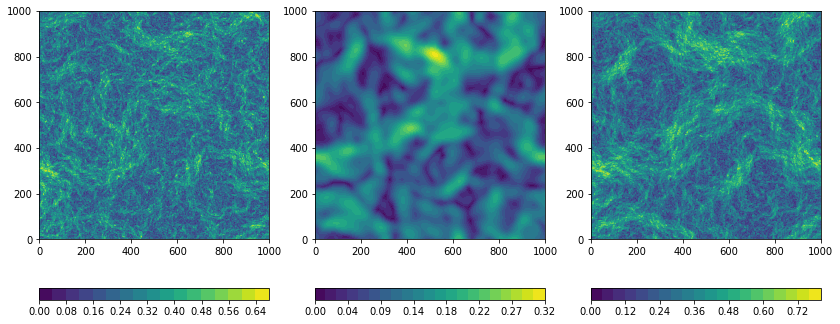

In [62]:
lin = np.linspace(U1_phi.min(), U1_phi.max(),20)
plt.figure(figsize=(14,6))
plt.subplot(131)
plt.contourf(U1_phi, 20)
plt.colorbar(orientation='horizontal', format='%.2f')
plt.subplot(132)
plt.contourf(U1pf, 20)
plt.colorbar(orientation='horizontal', format='%.2f')
plt.subplot(133)
plt.contourf(U1pf_diff, 20)
plt.colorbar(orientation='horizontal', format='%.2f')

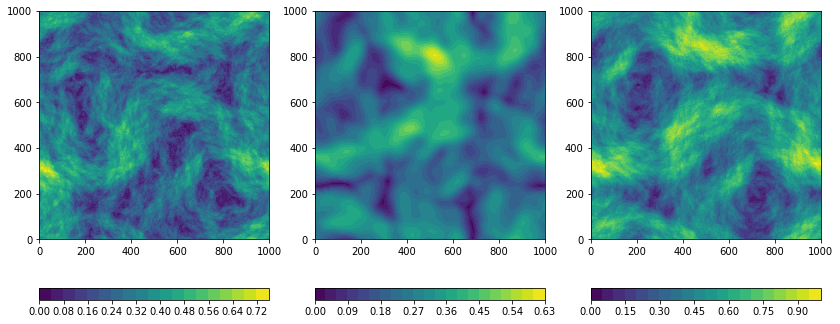

In [63]:
lin = np.linspace(U2_phi.min(), U2_phi.max(),20)
plt.figure(figsize=(14,6))
plt.subplot(131)
plt.contourf(U2_phi, 20)
plt.colorbar(orientation='horizontal', format='%.2f')
plt.subplot(132)
plt.contourf(U2pf, 20)
plt.colorbar(orientation='horizontal', format='%.2f')
plt.subplot(133)
plt.contourf(U2pf_diff, 20)
plt.colorbar(orientation='horizontal', format='%.2f')

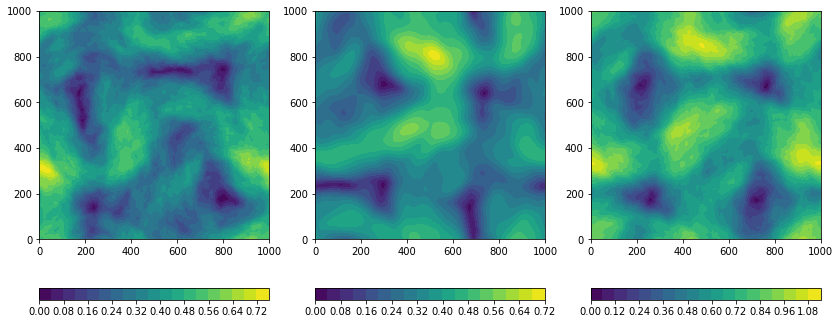

In [64]:
lin = np.linspace(U3_phi.min(), U3_phi.max(),20)
plt.figure(figsize=(14,6))
plt.subplot(131)
plt.contourf(U3_phi, 20)
plt.colorbar(orientation='horizontal', format='%.2f')
plt.subplot(132)
plt.contourf(U3pf, 20)
plt.colorbar(orientation='horizontal', format='%.2f')
plt.subplot(133)
plt.contourf(U3pf_diff, 20)
plt.colorbar(orientation='horizontal', format='%.2f')

In [65]:
div = .20 #.30
u3_syn = u3_psi + div*(u3_phi-u3p_f)
v3_syn = v3_psi + div*(v3_phi-v3p_f)
U3_syn = (u3_syn**2 + v3_syn**2)**.5
spec3_syn = spec.TWODimensional_spec(U3_syn,dx,dx, detrend=True)

u2_syn = u2_psi + div*(u2_phi-u2p_f)
v2_syn = v2_psi + div*(v2_phi-v2p_f)
U2_syn = (u2_syn**2 + v2_syn**2)**.5
spec2_syn = spec.TWODimensional_spec(U2_syn,dx,dx, detrend=True)

div1=.5
u1_syn = u1_psi + div1*(u1_phi-u1p_f)
v1_syn = v1_psi + div1*(v1_phi-v1p_f)
U1_syn = (u1_syn**2 + v1_syn**2)**.5
spec1_syn = spec.TWODimensional_spec(U1_syn,dx,dx, detrend=True)

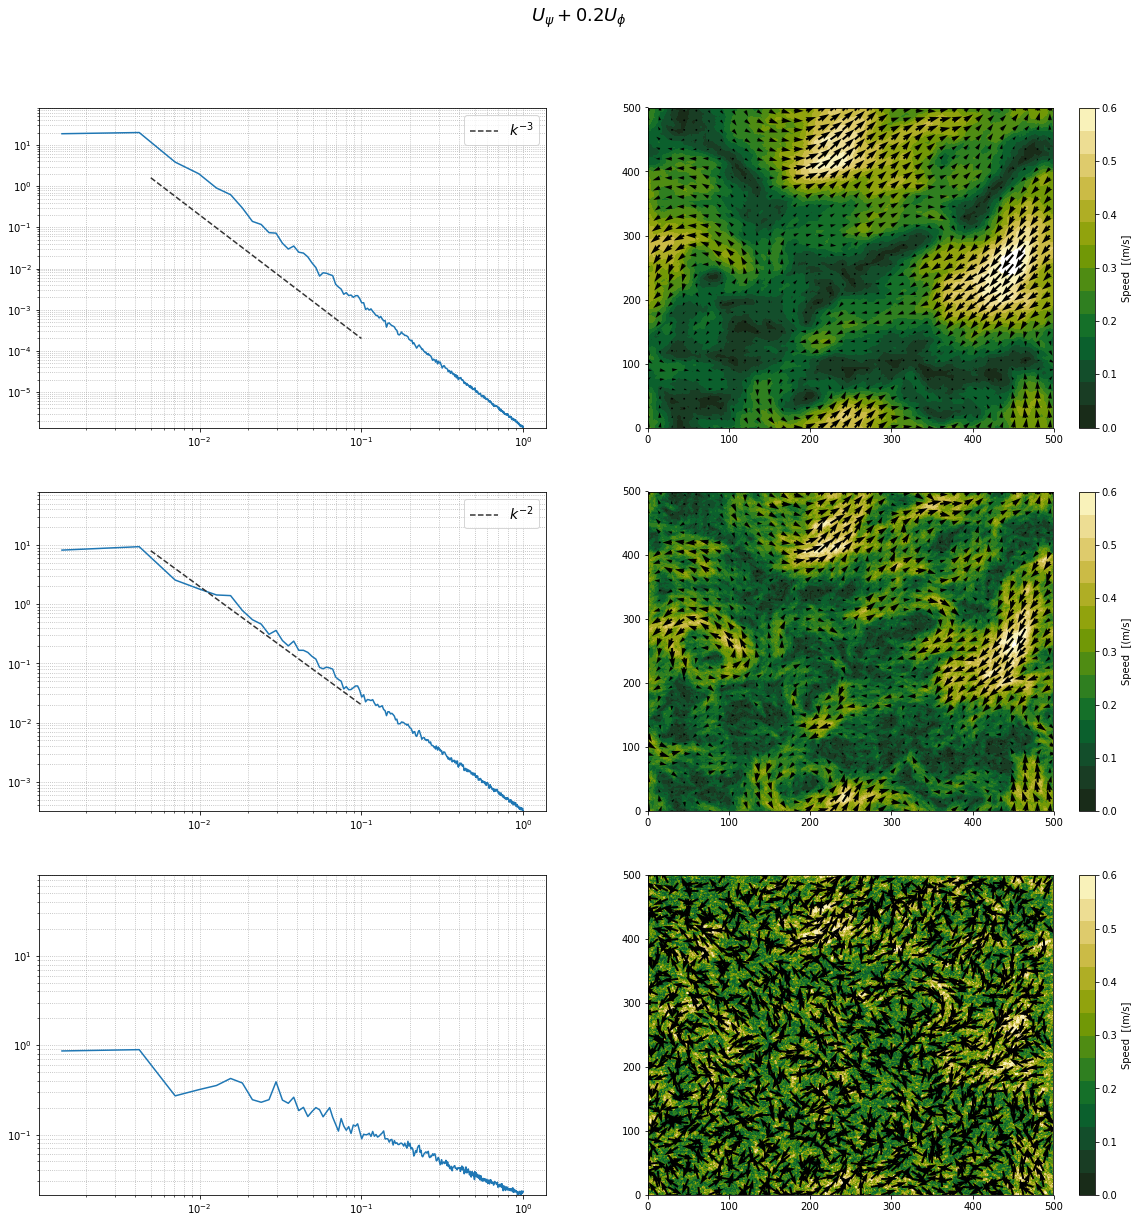

In [66]:
k_range3 = np.linspace(5.e-3,1.e-1, 20)
E3 = k_range3**-3./5.e6
k_range2 = np.linspace(5.e-3,1.e-1, 20)
E2 = k_range2**-2./5.e3
nd = 30
cmap = cmo.speed_r
lin = np.linspace(0,.6,15)
fig = plt.figure(figsize=(20,20))
plt.suptitle('$U_{\psi} + 0.2 U_{\phi}$', fontsize=18, y=0.95)
fig.add_subplot(321)
plt.loglog(spec3_syn.ki, spec3_syn.ispec)
plt.loglog(k_range3, E3, '--', color='.2',label='$k^{-3}$')
plt.ylim([0,80])
plt.legend(fontsize=14)
plt.grid(True, which="both", ls='dotted')
fig.add_subplot(322)
cs = plt.contourf(x, y, U3_syn, lin, cmap=cmap)
plt.quiver(x[::nd],x[::nd], u3_syn[::nd,::nd], v3_syn[::nd,::nd], color='black', width=0.005)
cbar = plt.colorbar(cs, orientation='vertical',format = '%.1f')
cbar.set_label('Speed  [(m/s]')
tick_locator = ticker.MaxNLocator(nbins=7)
cbar.locator = tick_locator
cbar.update_ticks()
fig.add_subplot(323)
plt.loglog(spec2_syn.ki, spec2_syn.ispec)
plt.loglog(k_range2, E2, '--', color='.2',label='$k^{-2}$')
plt.ylim([0,80])
plt.legend(fontsize=14)
plt.grid(True, which="both", ls='dotted')
fig.add_subplot(324)
cs = plt.contourf(x, y, U2_syn, lin, cmap=cmap)
plt.quiver(x[::nd],x[::nd], u2_syn[::nd,::nd], v2_syn[::nd,::nd], color='black', width=0.005)
cbar = plt.colorbar(cs, orientation='vertical',format = '%.1f')
cbar.set_label('Speed  [(m/s]')
tick_locator = ticker.MaxNLocator(nbins=7)
cbar.locator = tick_locator
cbar.update_ticks()
fig.add_subplot(325)
plt.loglog(spec1_syn.ki, spec1_syn.ispec)
#plt.loglog(k_range2, E2, '--', color='.2',label='$k^{-2}$')
plt.ylim([0,80])
plt.legend(fontsize=14)
plt.grid(True, which="both", ls='dotted')
fig.add_subplot(326)
cs = plt.contourf(x, y, U1_syn, lin, cmap=cmap)
nd1=25
plt.quiver(x[::nd1],x[::nd1], u1_syn[::nd1,::nd1]/U1_syn[::nd1,::nd1], v1_syn[::nd1,::nd1]/U1_syn[::nd1,::nd1], color='black', width=0.005, scale=25)
cbar = plt.colorbar(cs, orientation='vertical',format = '%.1f')
cbar.set_label('Speed  [(m/s]')
tick_locator = ticker.MaxNLocator(nbins=7)
cbar.locator = tick_locator
cbar.update_ticks()

In [67]:
div = .20 #.30
u_syn = u3_psi + div*(u1_phi-u1p_f)
v_syn = v3_psi + div*(v1_phi-v1p_f)
U_syn = (u_syn**2 + v_syn**2)**.5
spec_syn = spec.TWODimensional_spec(U_syn,dx,dx, detrend=True)

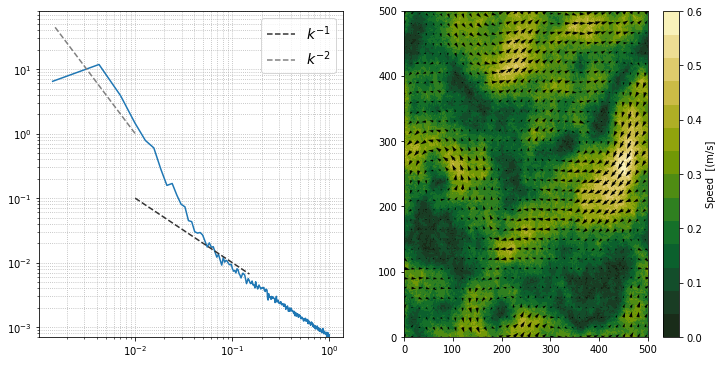

In [68]:
k_range1 = np.linspace(1e-2,1.5e-1, 20)
k_range2 = np.linspace(1.5e-3,1.e-2, 20)
E1 = (k_range1**-1.)*1e-3
E3 = k_range2**-2./1.e4
nd = 30
cmap = cmo.speed_r
lin = np.linspace(0,.6,15)
fig = plt.figure(figsize=(12,6))
fig.add_subplot(121)
plt.loglog(spec_syn.ki, spec_syn.ispec)
plt.loglog(k_range1, E1, '--',color='.2', label='$k^{-1}$')
plt.loglog(k_range2, E3, '--', color='.5',label='$k^{-2}$')
plt.ylim([0,80])
plt.legend(fontsize=14)
plt.grid(True, which="both", ls='dotted')
fig.add_subplot(122)
cs = plt.contourf(x, y, U_syn, lin, cmap=cmap)
plt.quiver(x[::nd],x[::nd], u_syn[::nd,::nd], v_syn[::nd,::nd], color='black', width=0.005)
cbar = plt.colorbar(cs, orientation='vertical',format = '%.1f')
#cbar.ax.xaxis.set_ticks_position('bottom')
#cbar.ax.xaxis.set_label_position('bottom')
cbar.set_label('Speed  [(m/s]')
tick_locator = ticker.MaxNLocator(nbins=7)
cbar.locator = tick_locator
cbar.update_ticks()